# Self Consistency Toy ex

SEOYEON CHOI  
2023-05-18

> Self Consistency

> **Tip with Title**
>
> Toy example for Self Consistency

Ref: [Self Consistency: A General Recipe for Wavelet Estimation With
Irregularly-spaced and/or Incomplete
Data](https://arxiv.org/pdf/math/0701196.pdf)

-   Self Consistency : A General Recipe for Wavelet Estimation With
    Irregularly-spaced and/or Incomplete Data
    -   2 Self Consistency: How Does It Work? 2.1 Self-consistency: An
        Intuitive Principle

$$\mathbb{E}(\hat{f}_{com} | f = \hat{f}_{obs}) = \hat{f}_{obs}$$

-   Original self-consistency
    -   $\hat{f}_{obs} = x_{obs}$ 만 가지고 결측값을 업데이트 한다.
    -   이 때, 전제 조건이 필요한데, 결측값을 채우지 않아도 업데이트
        가능, 즉 회귀 직선을 구하는 것이 가능해야 했다.
-   Lee and Meng(위 reference)
    -   $\hat{f}_{obs}$는 missing 값을 가지고 있는 데이터인데, STGCN과
        같이 missing 값을 채우지 않으면 모형이 돌아가지 않는 original 의
        전제조건을 만족하지 않은 경우가 있다.
    -   이 경우에도 임의의 값을 채우고 업데이트함으로써 true regression
        model에 수렴한다는 것을 밝혔다.

# Figure

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy

In [2]:
T = 10

e = np.random.normal(size=T)*2

x = np.array(range(1,11))

y_true = 2 * x

y = 2 * x + e

In [3]:
y_miss = y.copy()

In [4]:
miss_num = [4,6,7]

In [5]:
y_miss[miss_num] = np.nan

In [6]:
y_miss

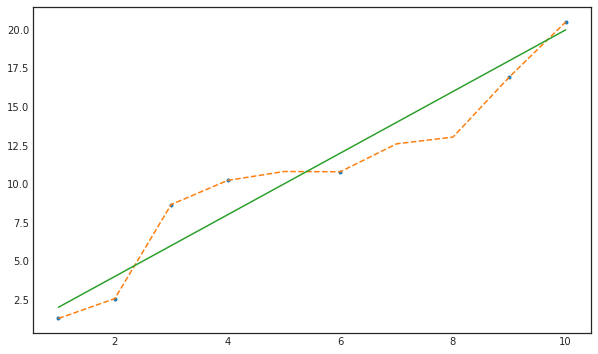

In [7]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10,6))
    plt.plot(x,y_miss,'.')
    plt.plot(x,y,'--')
    plt.plot(x,y_true)

In [8]:
# y_miss_impu = pd.DataFrame(y_miss).interpolate(method='nearest')

In [9]:
y_miss_impu = y_miss.copy()

In [10]:
y_miss_impu[miss_num] = 0

In [11]:
y_miss_impu[miss_num]

In [12]:
y_miss_impu

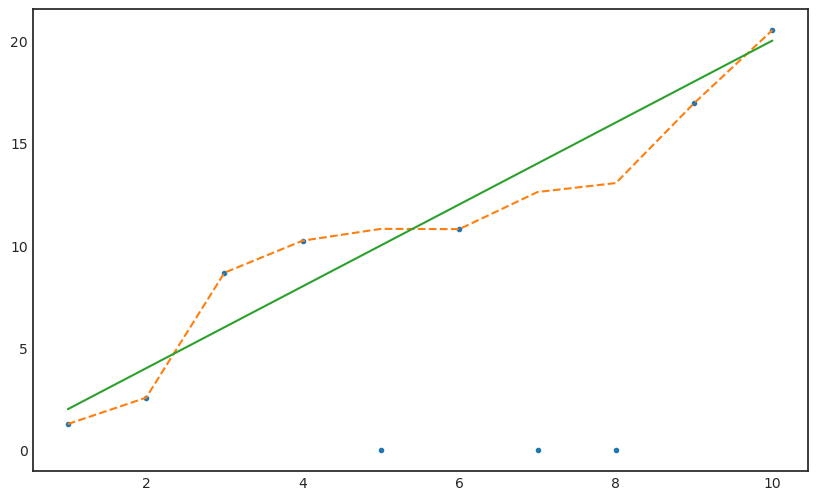

In [13]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10,6))
    plt.plot(x,y_miss_impu,'.')
    plt.plot(x,y,'--')
    plt.plot(x,y_true)

$$\hat{\beta} = \frac{\sum^n_{i=1} y_i x_i}{\sum^n_{i=1} x_i^2}$$

$$\hat{\beta} = \frac{\sum_{i=1}^m y_i x_i + \hat{\beta}_m \sum_{i=m+1}^n x_i^2}{\sum_{i=1}^n x_i^2}$$

In [14]:
y_miss_impu

In [15]:
yx_sq = np.sum(y_miss_impu * x);yx_sq

In [16]:
x_sq = sum(x**2);x_sq

In [17]:
beta_hat = yx_sq/x_sq

In [18]:
beta_hat

In [19]:
y_iter_zero = beta_hat * x

In [20]:
y_iter_zero

In [21]:
y_miss_impu_zero = y_miss_impu.copy()

In [22]:
y_miss_impu_zero[miss_num] = y_iter_zero[miss_num]

In [23]:
y_miss_impu_zero

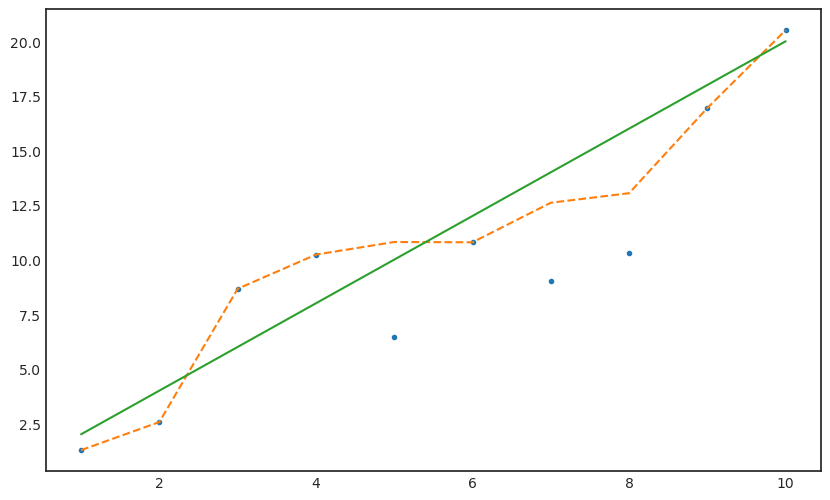

In [24]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10,6))
    plt.plot(x,y_miss_impu_zero,'.')
    plt.plot(x,y,'--')
    plt.plot(x,y_true)

In [25]:
yx_sq_one = sum([y_miss_impu_zero.tolist()] * x);yx_sq_one

In [26]:
beta_hat_iter_one = yx_sq_one/x_sq

In [27]:
beta_hat_iter_one = (beta_hat + beta_hat_iter_one).mean()

In [28]:
y_iter_one = beta_hat_iter_one * x

In [29]:
y_iter_one

In [30]:
y_iter_one[miss_num]

In [31]:
y_miss_impu_one = y_miss_impu_zero.copy()

In [32]:
y_miss_impu_one[miss_num] = y_iter_one[miss_num]

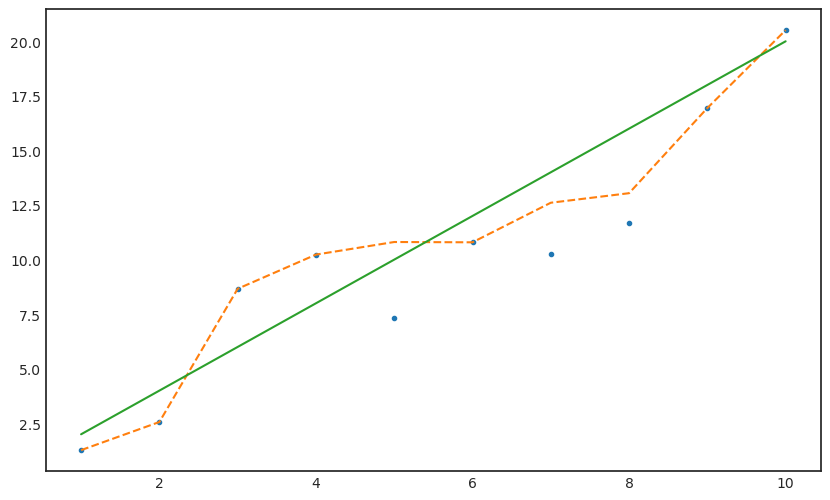

In [33]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10,6))
    plt.plot(x,y_miss_impu_one,'.')
    plt.plot(x,y,'--')
    plt.plot(x,y_true)

In [34]:
yx_sq_iter_two = sum([y_miss_impu_one.tolist()] * x);yx_sq_iter_two

In [35]:
beta_hat_iter_two = yx_sq_iter_two/x_sq

In [36]:
beta_hat_iter_two = (beta_hat_iter_one + beta_hat_iter_two).mean()

In [37]:
y_iter_two = beta_hat_iter_two * x

In [38]:
y_iter_two[miss_num]

In [39]:
y_miss_impu_two = y_miss_impu_one.copy()

In [40]:
y_miss_impu_two[miss_num,] = y_iter_two[miss_num,]

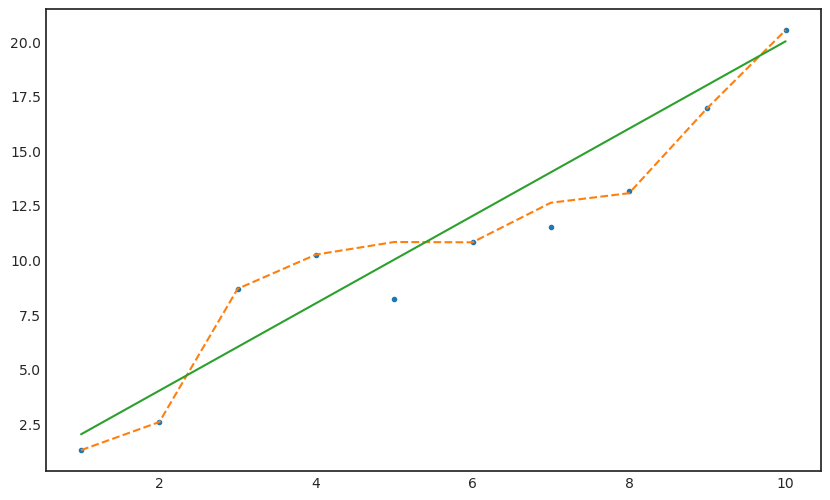

In [41]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10,6))
    plt.plot(x,y_miss_impu_two,'.')
    plt.plot(x,y,'--')
    plt.plot(x,y_true)

In [42]:
yx_sq_iter_tre = sum([y_iter_two.tolist()] * x);yx_sq_iter_tre

In [43]:
beta_hat_iter_tre = yx_sq_iter_tre/x_sq

In [44]:
beta_hat_iter_tre = (beta_hat_iter_two + beta_hat_iter_tre).mean()

In [45]:
y_iter_tre = beta_hat_iter_tre * x

In [46]:
y_iter_tre[miss_num]

In [47]:
y_miss_impu_tre = y_miss_impu_two.copy()

In [48]:
y_miss_impu_tre[miss_num] = y_iter_tre[miss_num]

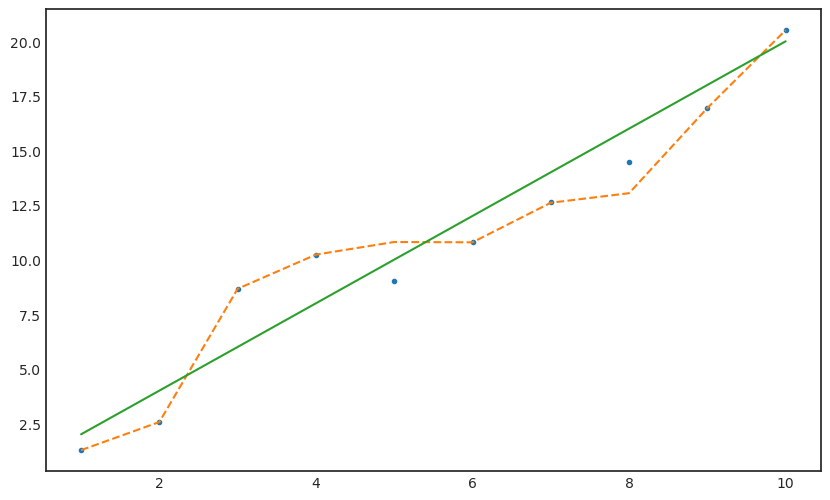

In [49]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10,6))
    plt.plot(x,y_miss_impu_tre,'.')
    plt.plot(x,y,'--')
    plt.plot(x,y_true)

In [50]:
yx_sq_iter_fth = sum([y_iter_tre.tolist()] * x);yx_sq_iter_fth

In [51]:
beta_hat_iter_fth = yx_sq_iter_fth/x_sq

In [52]:
beta_hat_iter_fth = (beta_hat_iter_tre + beta_hat_iter_fth).mean()

In [53]:
y_iter_fth = beta_hat_iter_fth * x

In [54]:
y_iter_fth[miss_num]

In [55]:
y_miss_impu_fth = y_miss_impu_tre.copy()

In [56]:
y_miss_impu_fth[miss_num,] = y_iter_fth[miss_num,]

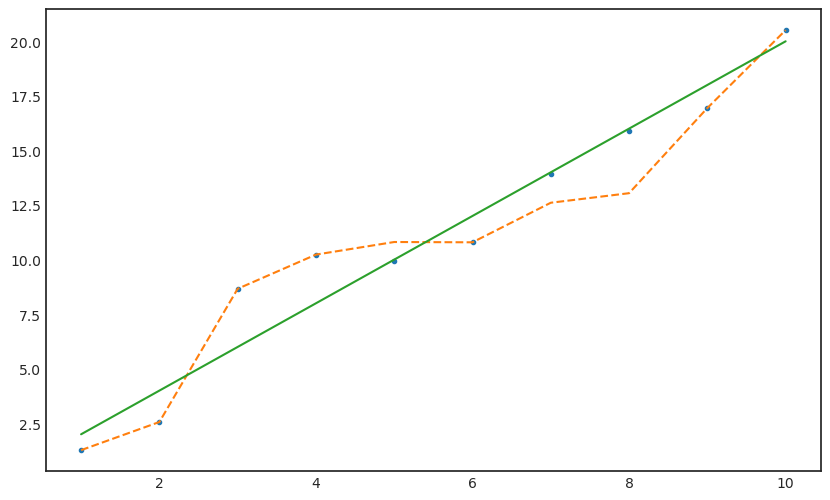

In [57]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10,6))
    plt.plot(x,y_miss_impu_fth,'.')
    plt.plot(x,y,'--')
    plt.plot(x,y_true)

In [58]:
yx_sq_iter_fif = sum([y_iter_fth.tolist()] * x);yx_sq_iter_fif

In [59]:
beta_hat_iter_fif = yx_sq_iter_fif/x_sq

In [60]:
beta_hat_iter_fif = (beta_hat_iter_fth + beta_hat_iter_fif).mean()

In [61]:
y_iter_fif = beta_hat_iter_fif * x

In [62]:
y_iter_fif[miss_num]

In [63]:
y_miss_impu_fif = y_miss_impu_fth.copy()

In [64]:
y_miss_impu_fif[miss_num] = y_iter_fif[miss_num]

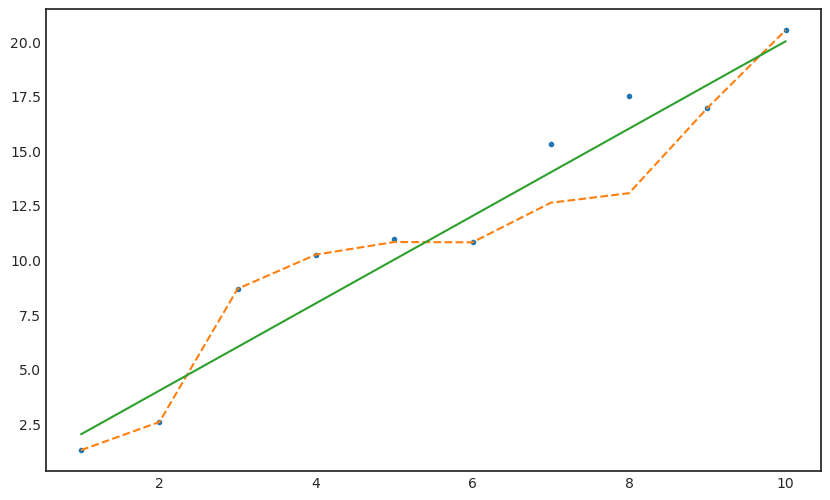

In [65]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10,6))
    plt.plot(x,y_miss_impu_fif,'.')
    plt.plot(x,y,'--')
    plt.plot(x,y_true)

# Result

In [69]:
miss_num_1 = [5,7,8]

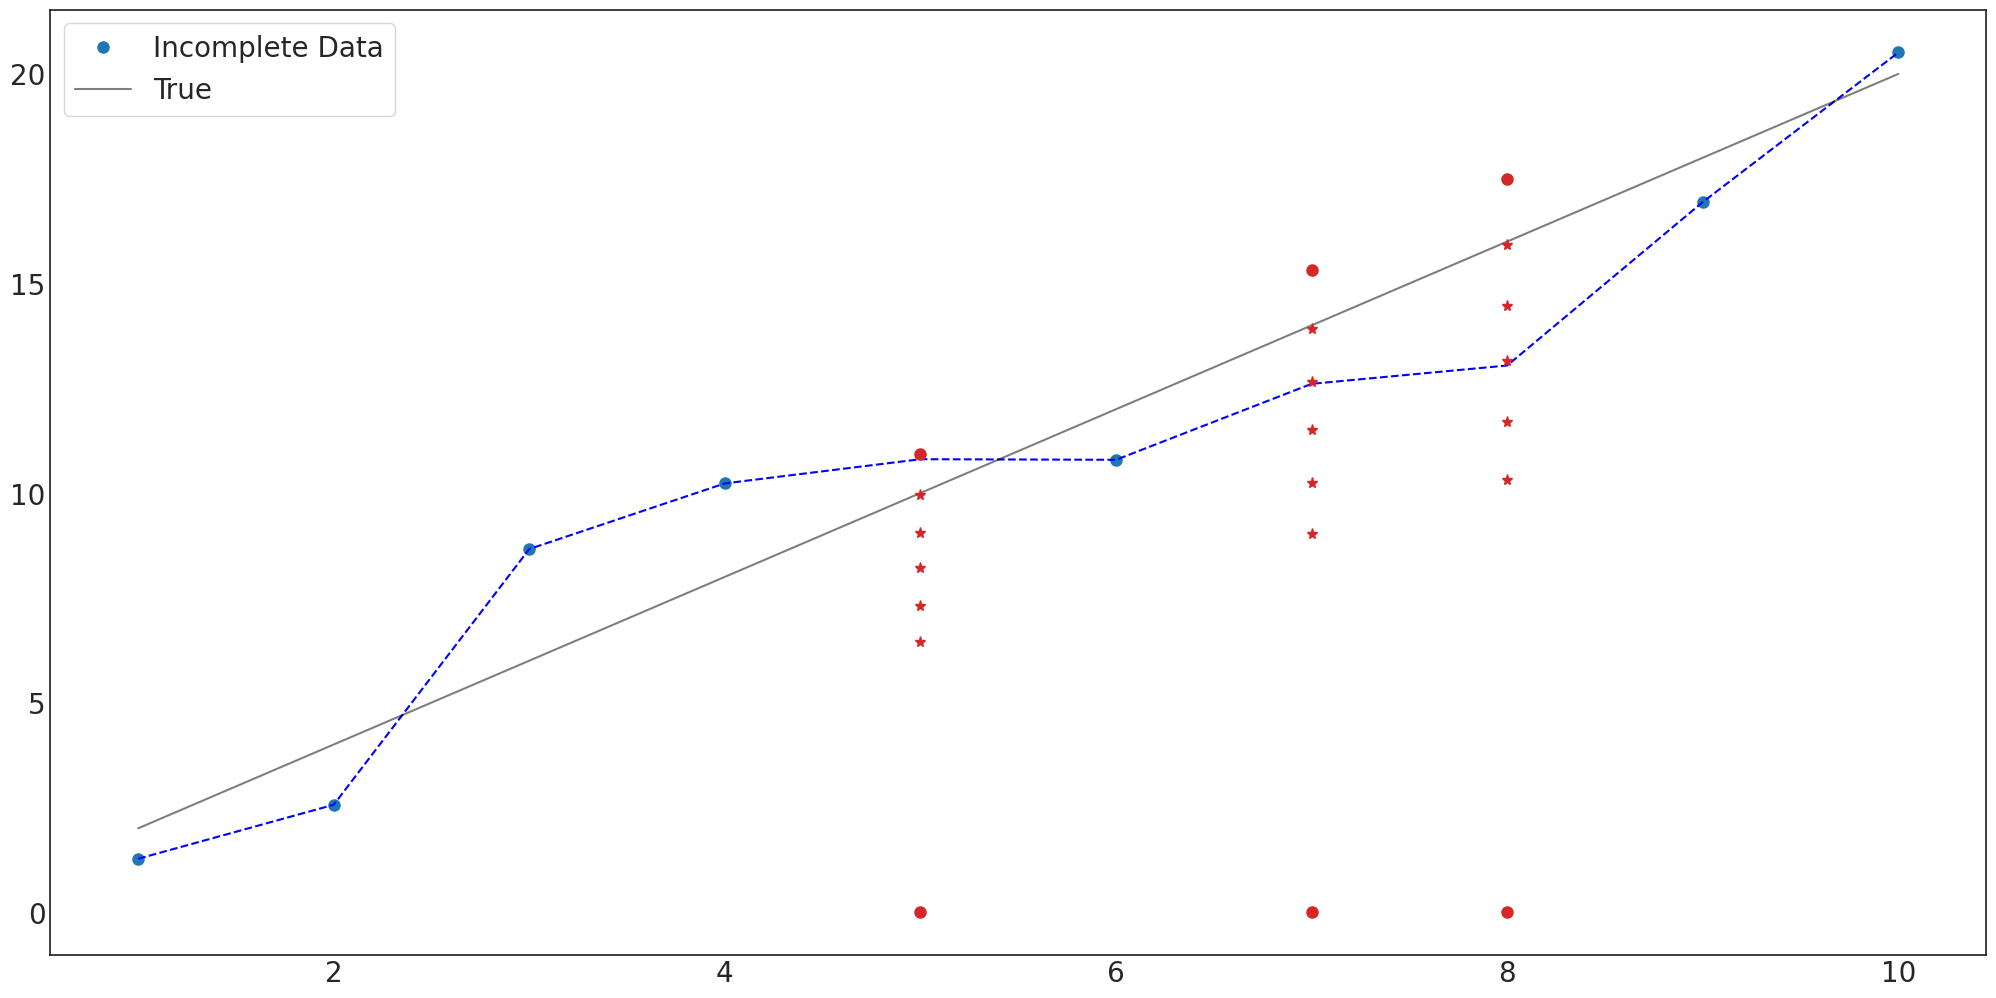

In [70]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    # fig.suptitle('Figure',fontsize=40)
    plt.tight_layout()
    
    ax.plot(x,y_miss,'o',label='Incomplete Data',markersize=8)
    ax.plot(x,y,'--',color='blue')
    ax.plot(x,y_true,label='True',color='black',alpha=0.5)
    ax.plot(miss_num_1,y_miss_impu[miss_num],'o',color='C3',markersize=8)
    ax.plot(miss_num_1,y_miss_impu_zero[miss_num],'*',color='C3',markersize=8)
    ax.plot(miss_num_1,y_miss_impu_one[miss_num],'*',color='C3',markersize=8)
    ax.plot(miss_num_1,y_miss_impu_two[miss_num],'*',color='C3',markersize=8)
    ax.plot(miss_num_1,y_miss_impu_tre[miss_num],'*',color='C3',markersize=8)
    ax.plot(miss_num_1,y_miss_impu_fth[miss_num],'*',color='C3',markersize=8)
    ax.plot(miss_num_1,y_miss_impu_fif[miss_num],'o',color='C3',markersize=8)
    ax.legend(fontsize=20,loc='upper left',facecolor='white', frameon=True)
    
    # ax.annotate('1st value',xy=(miss_num[0]+0.1,y_miss_impu[miss_num][0]),fontsize=20)
    # ax.annotate('1st value',xy=(miss_num[1]+0.1,y_miss_impu[miss_num][1]),fontsize=20)
    # ax.annotate('1st value',xy=(miss_num[2]+0.1,y_miss_impu[miss_num][2]),fontsize=20)
    # ax.annotate('5th iteration',xy=(miss_num[0]+0.1,y_miss_impu_fif[miss_num][0]),fontsize=20)
    # ax.annotate('5th iteration',xy=(miss_num[1]+0.1,y_miss_impu_fif[miss_num][1]),fontsize=20)
    # ax.annotate('5th iteration',xy=(miss_num[2]+0.1,y_miss_impu_fif[miss_num][2]),fontsize=20)
    
    # ax.arrow(miss_num[0]+0.4, y_miss_impu[miss_num][0]+0.6, 0, y_miss_impu_fif[miss_num][0]-1.5,linestyle= 'dashed', head_width=0.1, head_length=0.3, fc='black',ec='black',alpha=0.5)
    # ax.arrow(miss_num[1]+0.4, y_miss_impu[miss_num][1]+0.6, 0, y_miss_impu_fif[miss_num][1]-1.5,linestyle= 'dashed', head_width=0.1, head_length=0.3, fc='black',ec='black',alpha=0.5)
    # ax.arrow(miss_num[2]+0.4, y_miss_impu[miss_num][2]+0.6, 0, y_miss_impu_fif[miss_num][2]-1.5,linestyle= 'dashed', head_width=0.1, head_length=0.3, fc='black',ec='black',alpha=0.5)

    # ax.plot(miss_num, y_miss_impu[miss_num], 'o', markersize=30, markerfacecolor='none', markeredgecolor='red',markeredgewidth=1,color='C4')
    
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)
# plt.savefig('Self_consistency_Toy.png')

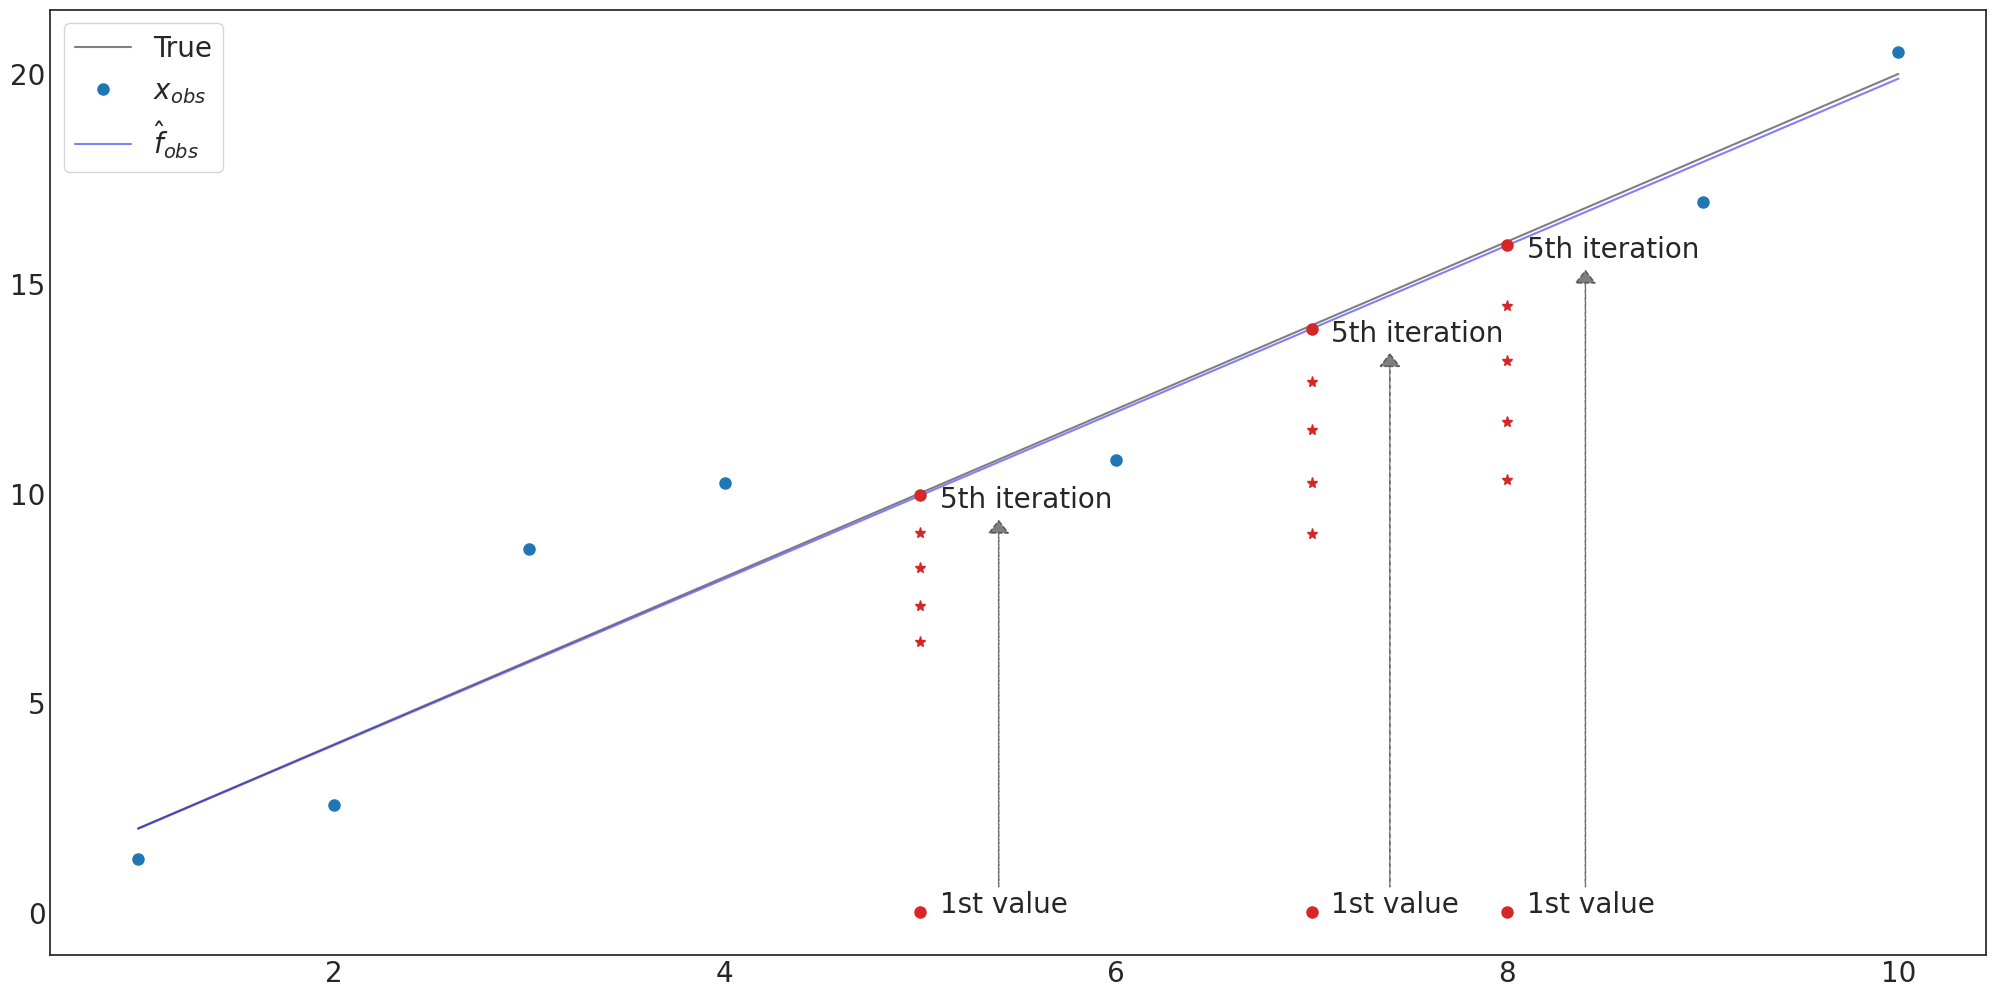

In [93]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    # fig.suptitle('Figure',fontsize=40)
    plt.tight_layout()
    
    ax.plot(x,y_true,label='True',color='black',alpha=0.5)
    ax.plot(x,y_miss,'o',label='$x_{obs}$',markersize=8)
    # ax.plot(x,y,'--',color='blue')
    
    # ax.plot(x,y_iter_zero)
    # ax.plot(x,y_iter_one)
    # ax.plot(x,y_iter_two)
    # ax.plot(x,y_iter_tre)
    ax.plot(x,y_iter_fth,color='blue',alpha=0.5,label='$\hat{f}_{obs}$')
    # ax.plot(x,y_iter_fif)
    ax.plot(miss_num_1,y_miss_impu[miss_num],'o',color='C3',markersize=8)
    ax.plot(miss_num_1,y_miss_impu_zero[miss_num],'*',color='C3',markersize=8)
    ax.plot(miss_num_1,y_miss_impu_one[miss_num],'*',color='C3',markersize=8)
    ax.plot(miss_num_1,y_miss_impu_two[miss_num],'*',color='C3',markersize=8)
    ax.plot(miss_num_1,y_miss_impu_tre[miss_num],'*',color='C3',markersize=8)
    ax.plot(miss_num_1,y_miss_impu_fth[miss_num],'o',color='C3',markersize=8)
    # ax.plot(miss_num,y_miss_impu_fif[miss_num],'o',color='C3',markersize=8)
    
    ax.legend(fontsize=20,loc='upper left',facecolor='white', frameon=True)
    
    ax.annotate('1st value',xy=(miss_num_1[0]+0.1,y_miss_impu[miss_num][0]),fontsize=20)
    ax.annotate('1st value',xy=(miss_num_1[1]+0.1,y_miss_impu[miss_num][1]),fontsize=20)
    ax.annotate('1st value',xy=(miss_num_1[2]+0.1,y_miss_impu[miss_num][2]),fontsize=20)
    ax.annotate('5th iteration',xy=(miss_num_1[0]+0.1,y_miss_impu_fth[miss_num][0]-0.3),fontsize=20)
    ax.annotate('5th iteration',xy=(miss_num_1[1]+0.1,y_miss_impu_fth[miss_num][1]-0.3),fontsize=20)
    ax.annotate('5th iteration',xy=(miss_num_1[2]+0.1,y_miss_impu_fth[miss_num][2]-0.3),fontsize=20)
    
    ax.arrow(miss_num_1[0]+0.4, y_miss_impu[miss_num][0]+0.6, 0, y_miss_impu_fth[miss_num][0]-1.5,linestyle= 'dashed', head_width=0.1, head_length=0.3, fc='black',ec='black',alpha=0.5)
    ax.arrow(miss_num_1[1]+0.4, y_miss_impu[miss_num][1]+0.6, 0, y_miss_impu_fth[miss_num][1]-1.5,linestyle= 'dashed', head_width=0.1, head_length=0.3, fc='black',ec='black',alpha=0.5)
    ax.arrow(miss_num_1[2]+0.4, y_miss_impu[miss_num][2]+0.6, 0, y_miss_impu_fth[miss_num][2]-1.5,linestyle= 'dashed', head_width=0.1, head_length=0.3, fc='black',ec='black',alpha=0.5)

    # ax.plot(miss_num_1, y_miss_impu[miss_num], 'o', markersize=30, markerfacecolor='none', markeredgecolor='red',markeredgewidth=1,color='C4')
    
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)
plt.savefig('Self_consistency_Toy_0617.png')

# Theory

## 2 Self Consistency: How Does It Work?

### 2.1 Self-consistency: An Intuitive Principle

책에서의 가정

-   $x = 0,1,2,3,\dots,16$으로 fixed 되어 있음.
-   $y_0,\dots, y_{13}$까지의 값을 알고 있는데 $y_{14},y_{15},y_{16}$의
    값은 모른다.

$y_i=\beta x_i + \epsilon_i, i=1,\dots,n, \epsilon_i \sim \text{i.i.d.}F(0,\sigma^2)$

-   $\beta$의 최소제곱추정치

$\hat{\beta}_n = \hat{\beta}_n(y_1 ,\dots,y_n) = \frac{\sum^n_{i=1} y_i x_i}{\sum^n_{i=1} x_i^2}$

-   단, $m<n$ 이고, $\sum ^n_{m+1} x_i^2 > 0$ 일 때,

$E(\hat{\beta}_n|y_a, \dots,y_m,;\beta = \hat{\beta}_m) = \hat{\beta}_m$

the least-squares estimator has a (Martingale-like property)[1], and
reaches a perfect equilibrium in its projective properties

참고;(위키백과)\[https://ko.wikipedia.org/wiki/%EB%A7%88%ED%8C%85%EA%B2%8C%EC%9D%BC\]

1.  $\beta_n$을 구한다.
2.  $\beta_n \times x$ 를 구한다.
3.  missing 값이 있는 index만 대체한다.
4.  다시 $\beta_n$을 구한다.
5.  .. 반복

$\beta$의 선형성 때문에 가능한 이론

아래 계산하면 맞아야 함

$\hat{\beta}_n = \frac{\sum_{i=1}^m y_i x_i + \hat{\beta}_m \sum_{i=m+1}^n x_i^2}{\sum_{i=1}^n x_i^2}$

### 2.2 A Self–consistent Regression Estimator

목적은 최적의 $\hat{f}_{com}$ 찾는 것, 일단 이 paper는 웨이블릿에 중점을
두고 비모수, 준모수 회귀로 확장 가능 누적 분포 함수 CDF 찾는 것이 목적

[1] 확률 과정 중 과거의 정보를 알고 있다면 미래의 기댓값이 현재값과
동일한 과정